**Now we plot the heatmap**

In [3]:
from PIL import Image, ImageDraw, ImageFont
%pylab inline
%load_ext watermark
%watermark

Populating the interactive namespace from numpy and matplotlib
11/03/2015 19:51:31

CPython 2.7.10
IPython 4.0.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 3.13.0-66-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
cd heatmap/

/media/manuel/Backup/Proyectos/tweepy murcia/heatmap


To plot the map I used the awesome [Heatmap.py](http://www.sethoscope.net/heatmap/)

In [10]:
#This is the file structure that heatmap.py requires
!head tweets_heatmap

 37.984111 -1.129874
 37.992924 -1.139241
 37.996403 -1.096805
 37.996371 -1.096852
 37.992928 -1.139248
 38.018327 -1.133758
 37.975422 -1.129575
 37.984102 -1.114801
 37.975587 -1.103640
 38.007583 -1.128448


In [6]:
#Number of geocoded tweets
!wc -l tweets_heatmap 

95383 tweets_heatmap


In [14]:
'''We call heatmap.py directly to render the points
the script has an extensive amount of arguments, these ones are the ones I settled on after a bit of trial an error

-b black -> set the background to black. Not really required because we are downloading maps
-p tweets_heatmap -> the file that includes the points
-W 1800 Image width
-o murcia_tweets.png -> the output file
--osm download Open Street Map tiles as a background to the points
--osm_base http://a.basemaps.cartocdn.com/dark_all/ -> which osm map tile style to use 
   map list is here http://wiki.openstreetmap.org/wiki/Tile_servers
--decay How much to blur and aggregate the points 
-v -> verbose, display output commands
-r 5 pixel radius for each point
'''

!python heatmap.py \
--debug \
-b black \
-p tweets_heatmap \
-W 1800 \
-o murcia_tweets.png \
-P equirectangular \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/dark_all/ \
--decay 0.8  -v -r 5     

      26 ms  // reading points from tweets_heatmap
     385 ms  // read 95384 points
    1221 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
    1221 ms  // Choosing OSM zoom level 15
    1221 ms  // scale: 4.777314 meters/pixel (23301.688889 pixels/degree)
Retrieving 80 tiles...
... done.
    1294 ms  // input extent: 37.9514335994,-1.15784415344,38.0294570424,-1.08078284656
    1294 ms  // output extent: -959448.695273,-26979.7242453,-957141.821311,-25184.0656469
    1294 ms  // creating an appending matrix
    1294 ms  // processing data
   25946 ms  // combining coincident points
   33167 ms  // saving image (1786 x 2298)
   38544 ms  // end


This command will take a while, it will detect the bounding box of your points (minimum latitude and longitude), download OSM tiles and plot the points.

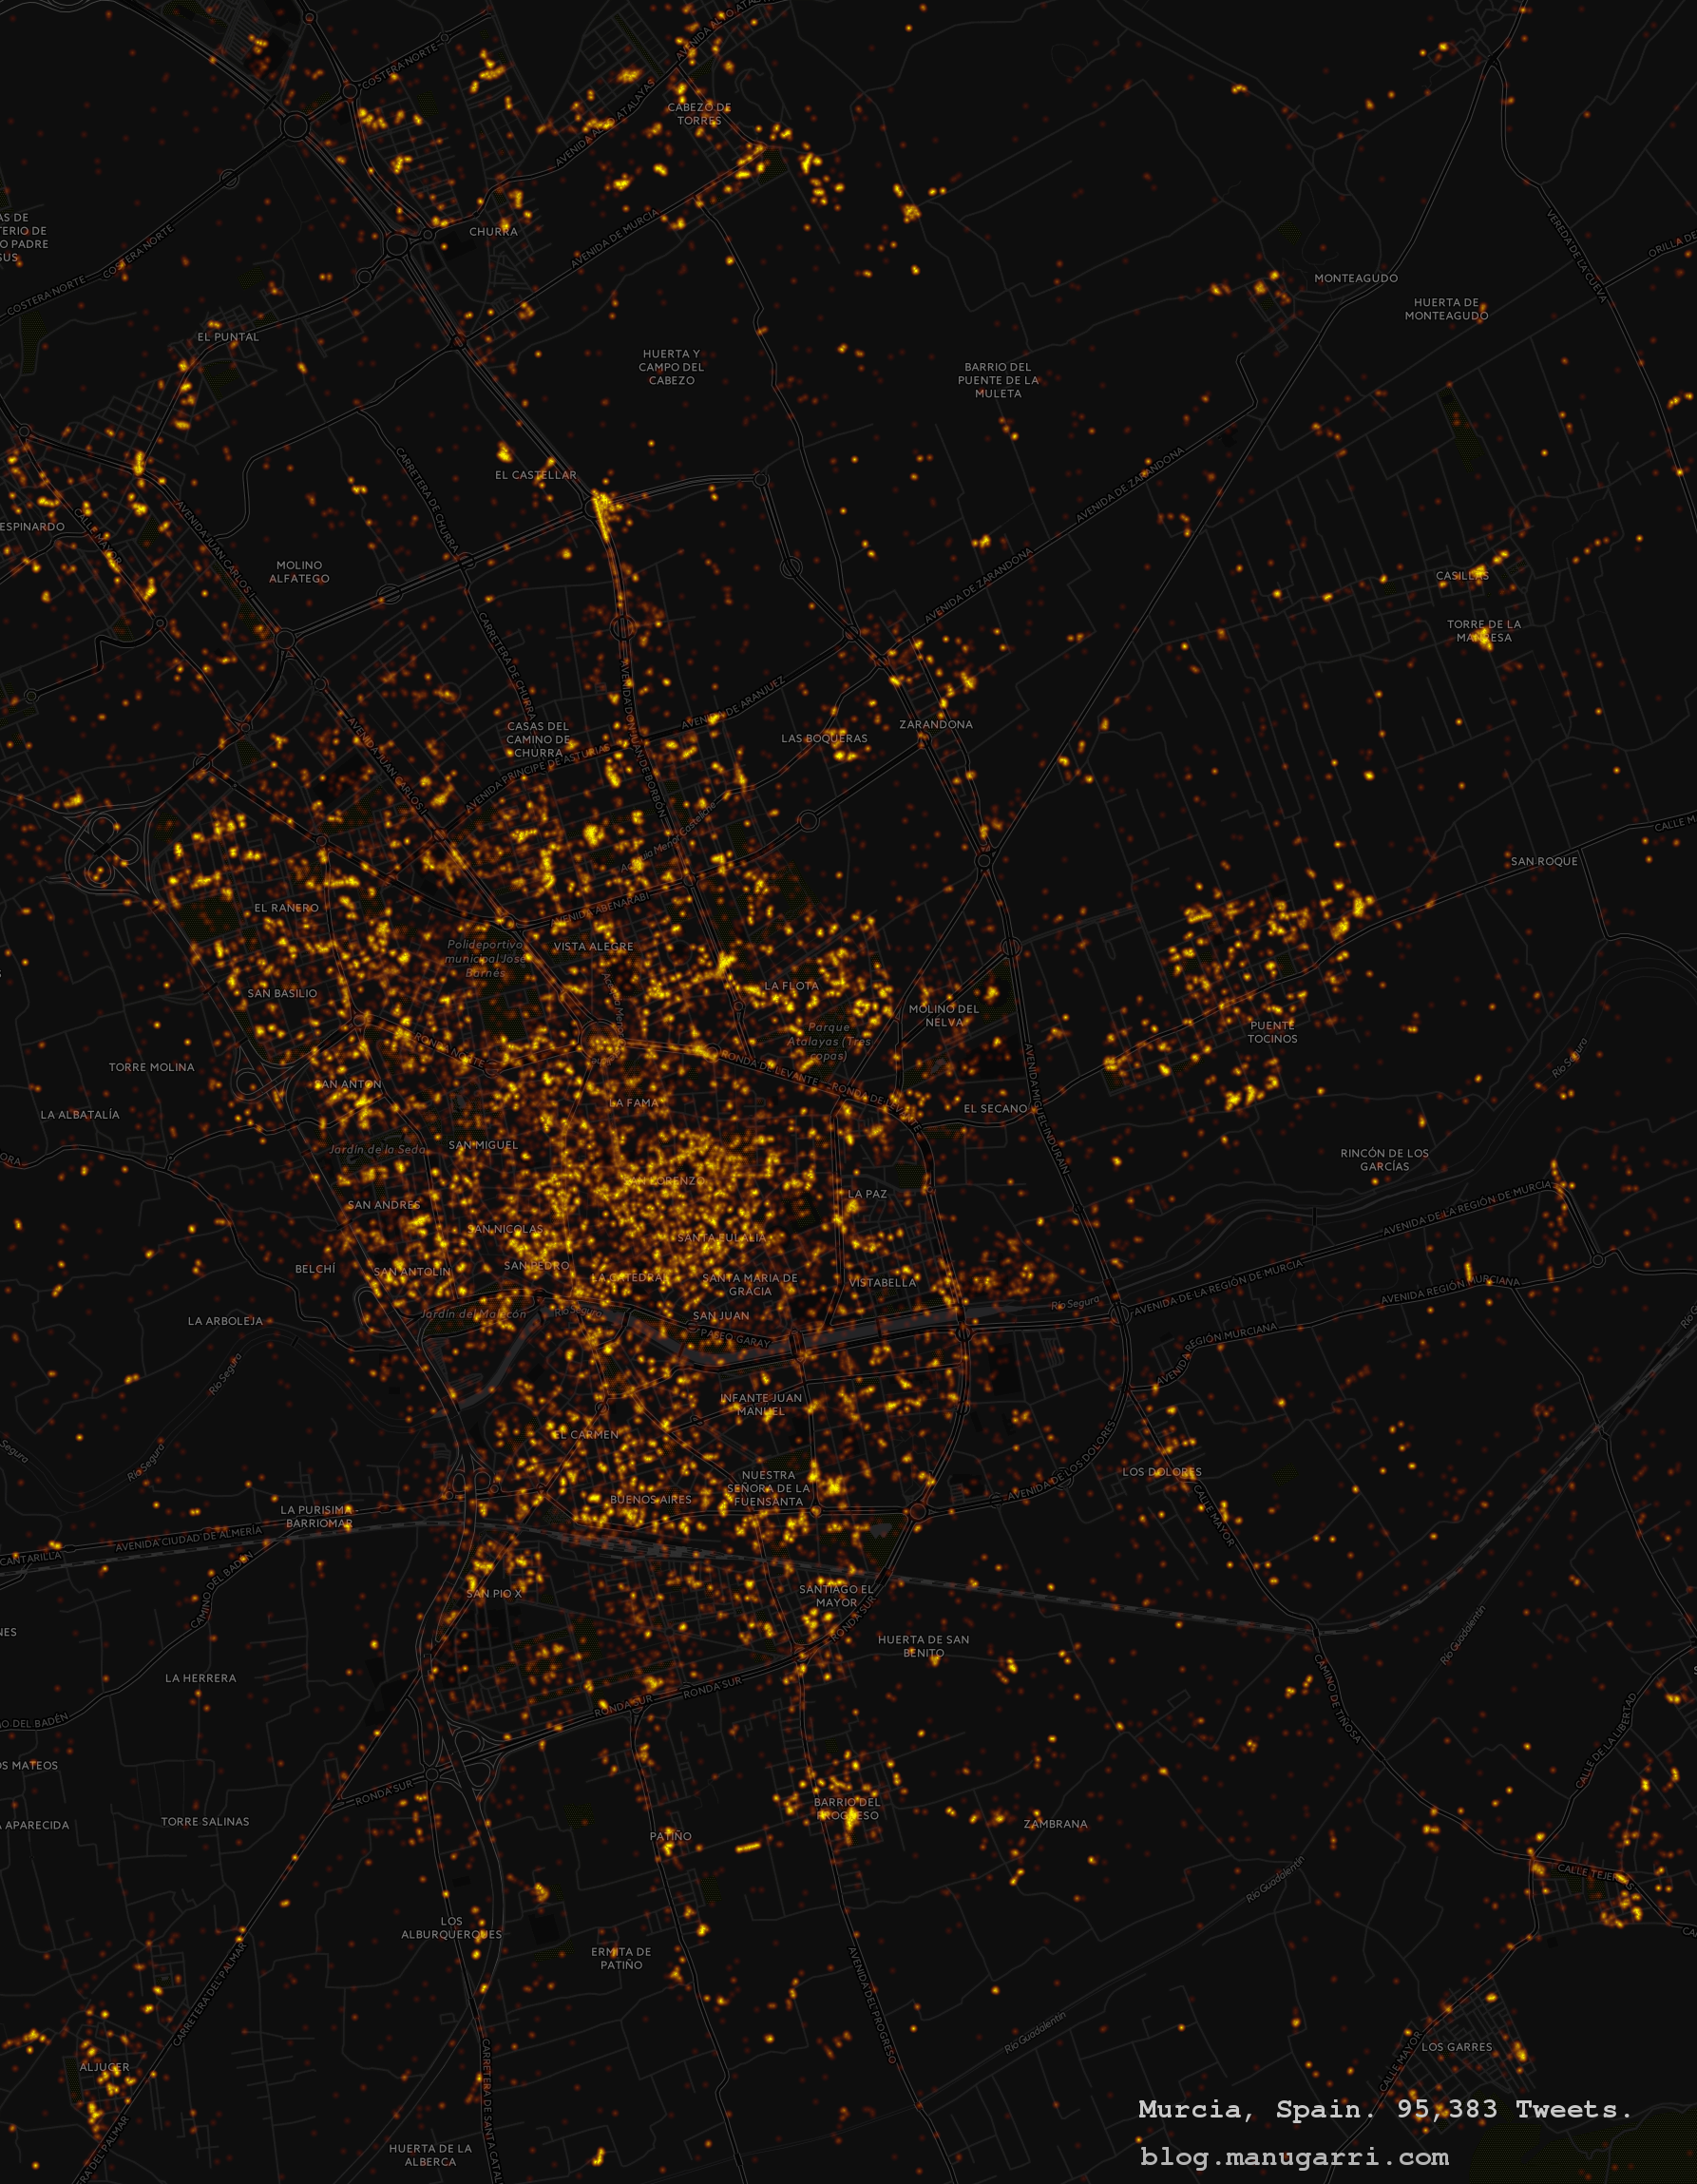

In [47]:
im = Image.open('murcia_tweets.png')
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("/usr/share/fonts/truetype/tlwg/TlwgTypewriter-Bold.ttf", 30)
draw.text((1200, 2200),"Murcia, Spain. 95,383 Tweets.",(200,200,200), font=font)
draw.text((1200, 2250),"blog.manugarri.com",(180,180,180), font=font)

im.save('murcia_tweets.png')
im

By default heatmap.py uses a red/yellow gradient which looks very nice

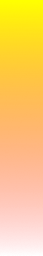

In [12]:
Image('gradient-1.2.png')

you can change the colors either by specifying the colors or by providing a gradient file. Lets create another gradient

In [17]:
from scipy.misc import imread, imsave
from colour import Color

base_gradient = imread('gradient-1.2.png')
base_gradient.shape

(256, 43, 4)

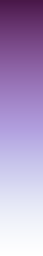

In [7]:
#I use http://colourco.de/ for color picking

hsva_min = Color()
hsva_min.hex_l = '#b0c6e5'

hsva_max = Color()
hsva_max.hex_l = '#491849'

color_gradient = list(hsva_max.range_to(hsva_min,base_gradient.shape[0]))
alpha = np.arange(0,256)[::-1]

gradient = []
for i, color_point in enumerate(color_gradient):
    rgb = list(color_point.get_rgb())
    rgb = [int(e * 255) for e in rgb]
    rgb.append(alpha[i])
    gradient.append([rgb])
color_gradient = np.array(gradient)

width = 43
from copy import deepcopy

color_gradient_row = deepcopy(color_gradient)

for col in range(width-1):
    color_gradient = np.hstack((color_gradient, color_gradient_row))

imsave('gradient2.png', color_gradient)
Image('gradient2.png')

And we also change the map style

In [15]:
!python heatmap.py \
-G gradient2.png \
-p tweets_heatmap \
-W 1800 \
-o murcia_tweets_white.png \
-P equirectangular \
--osm \
--osm_base http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.8  -v -r 5     

      40 ms  // reading points from tweets_heatmap
     428 ms  // read 95384 points
    1317 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
    1317 ms  // Choosing OSM zoom level 15
    1317 ms  // scale: 4.777314 meters/pixel (23301.688889 pixels/degree)
Retrieving 80 tiles...
... done.
    5015 ms  // input extent: 37.9514335994,-1.15784415344,38.0294570424,-1.08078284656
    5015 ms  // output extent: -959448.695273,-26979.7242453,-957141.821311,-25184.0656469
    5016 ms  // creating an appending matrix
    5016 ms  // processing data
   32874 ms  // combining coincident points
   40490 ms  // saving image (1786 x 2298)
   46633 ms  // end


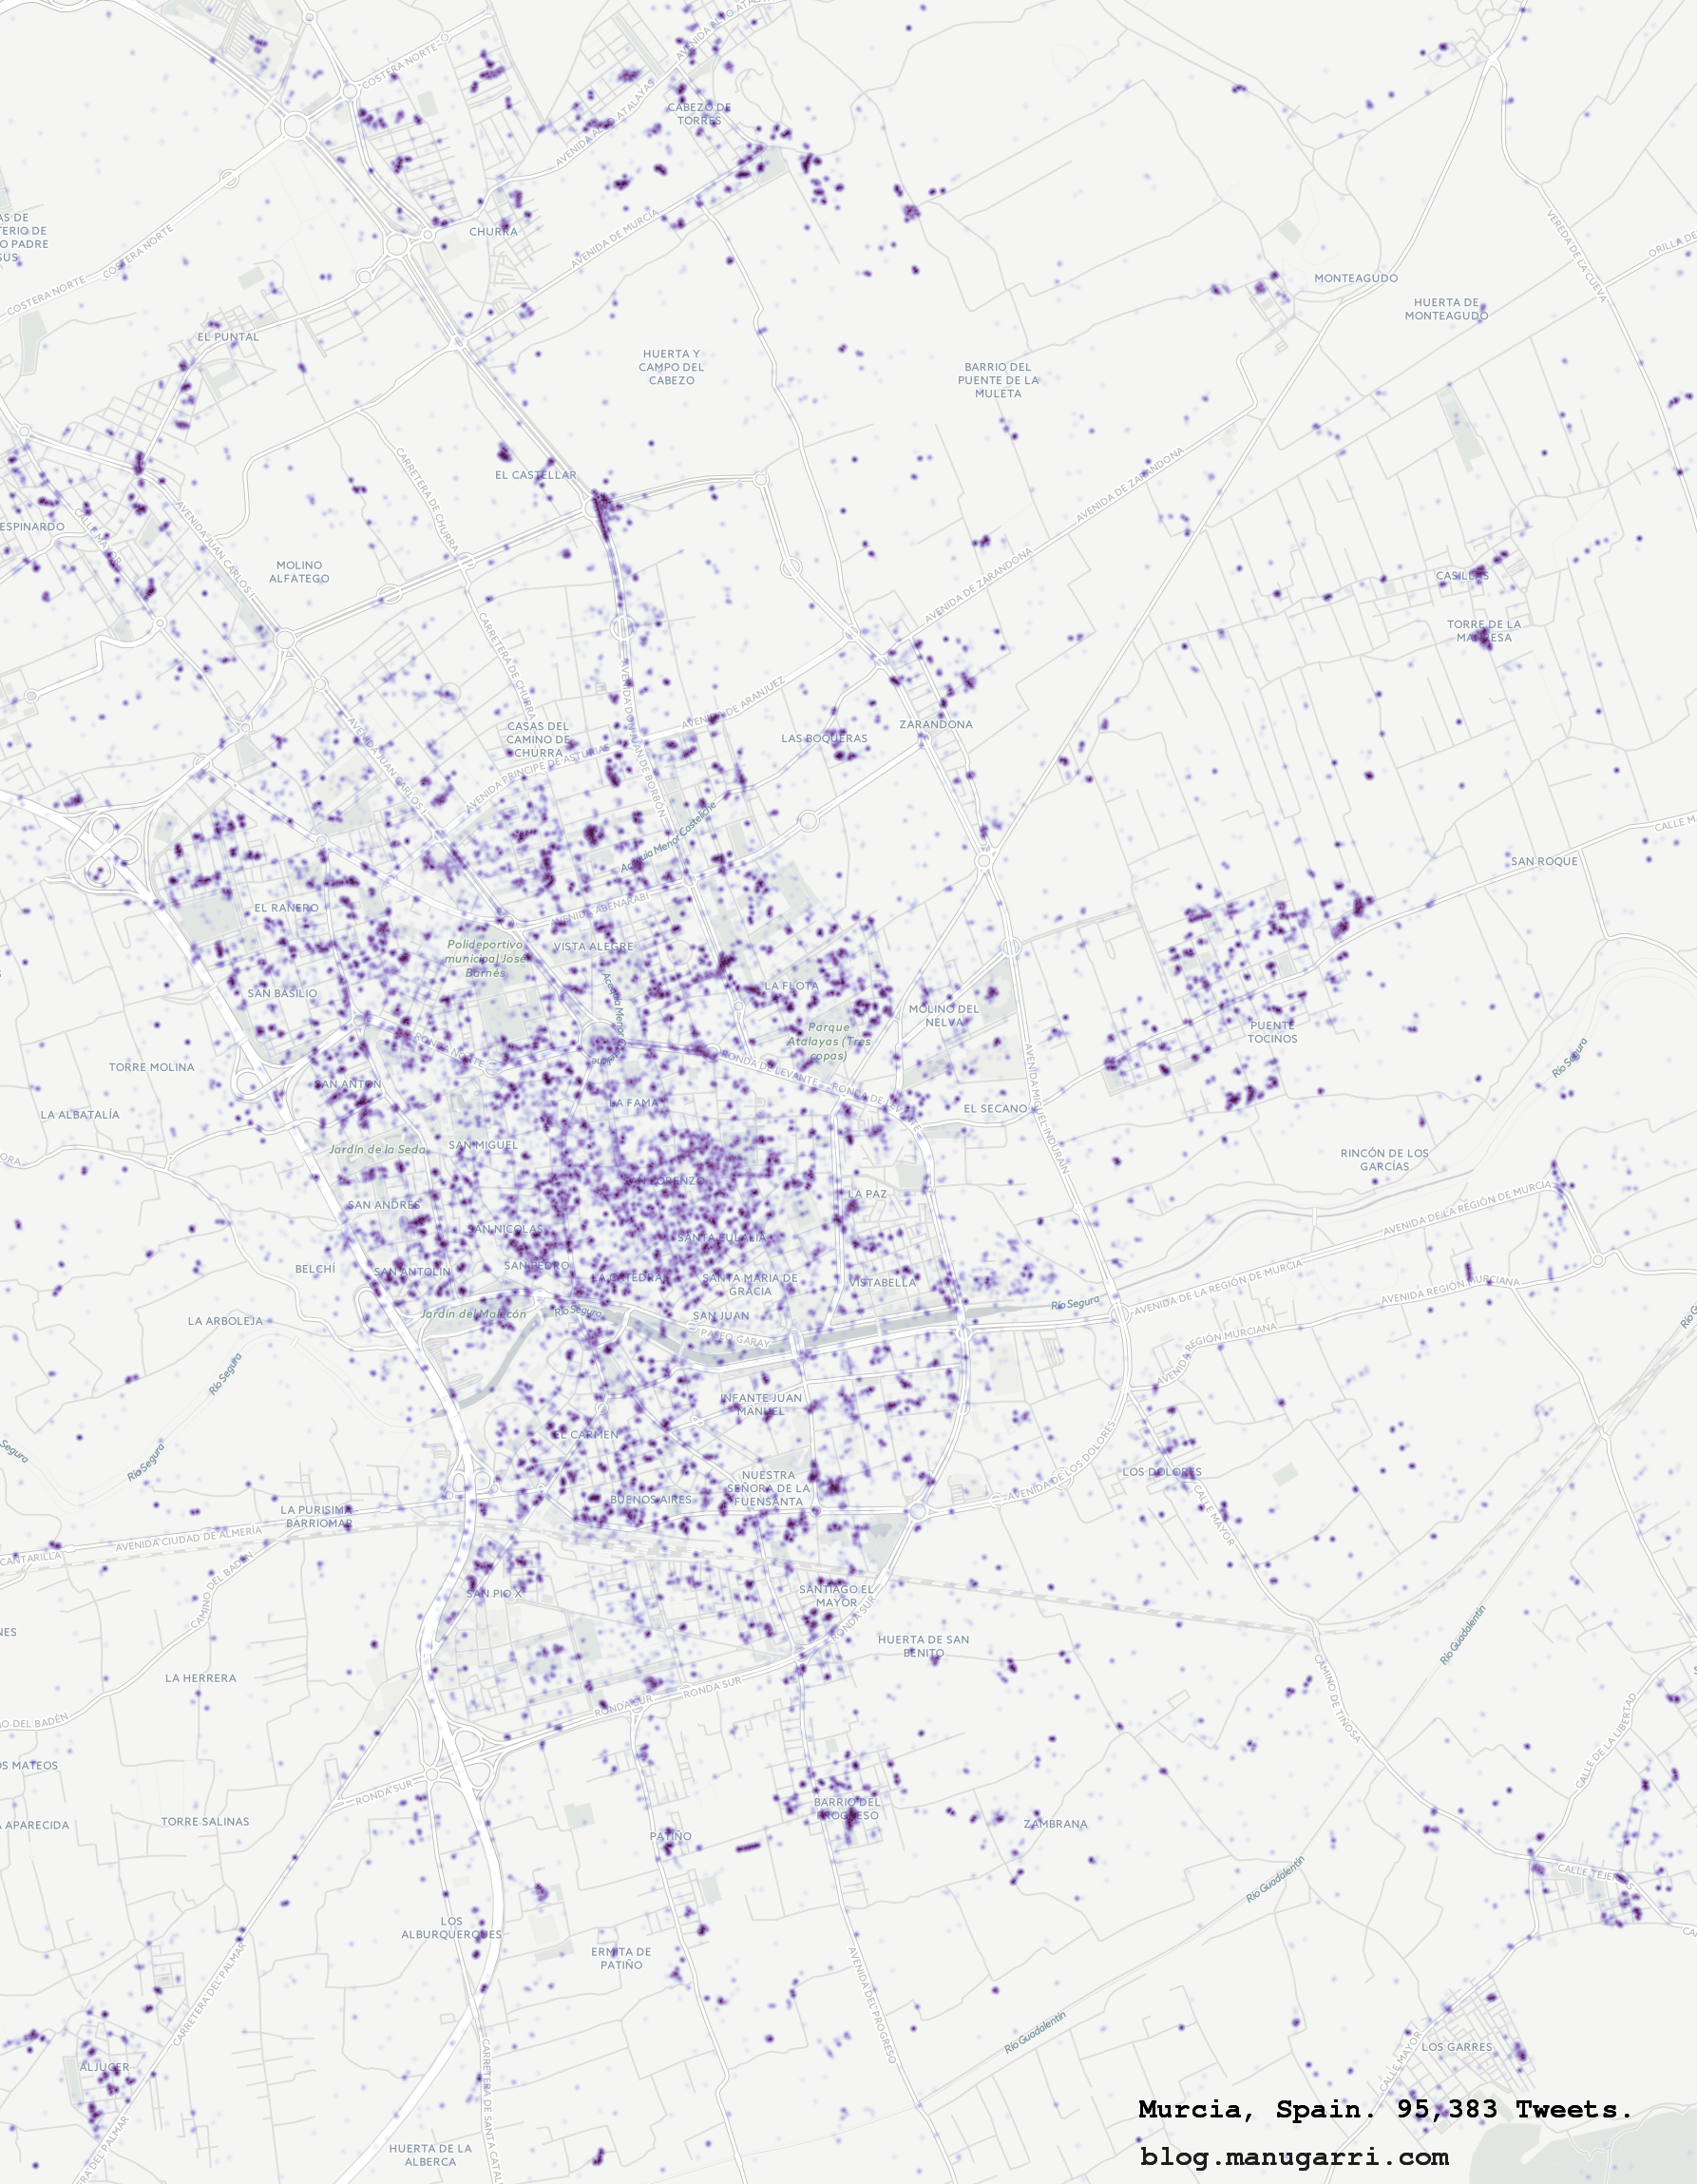

In [50]:
from PIL import Image, ImageDraw, ImageFont
im = Image.open('murcia_tweets_white.png')
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("/usr/share/fonts/truetype/tlwg/TlwgTypewriter-Bold.ttf", 30)
draw.text((1200, 2200),"Murcia, Spain. 95,383 Tweets.",(0,0,0), font=font)
draw.text((1200, 2250),"blog.manugarri.com",(30,30,30), font=font)

im.save('murcia_tweets_white.png')
im